In [1]:
import numpy as np
from astropy.table import Table, vstack
import healpy as hp
import sys
import os
import time
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
import pandas as pd

The test for validation of the members follows those steps:
1) Take 1 random cl_id in the center of the tract (use tractid_map_associations_noBuffer.fits)
2) For this cluster, check if there is the same amount of members (in comparison to my generated catalog named tractid_map_associations_w_mag.fits)
3) If 2 is ok, verify that GALID is the same of each members
4) If 3 is ok, verify that p_mem are the same for each members
5) Repeat 20 times for 20 different clusters

In [2]:
#CosmoDC2
tiles = ['10066', '10067', '10068', '10069', '10070', '10071', '10072', '10073', '10074', '10193', '10194', '10195', '10196', '10197', '10198', '10199', '10200', '10201', '10202', '10321', '10322', 
         '10323', '10324', '10325', '10326', '10327', '10328', '10329', '10444', '10445', '10446', '10447', '10448', '10449', '10450', '10451', '10452', '8786', '8787', '8788', '8789', '8790', '8791',
         '8792', '8793', '8794', '8913', '8914', '8915', '8916', '8917', '8918', '8919', '8920', '8921', '9042', '9043', '9044', '9045', '9046', '9047', '9048', '9049', '9050', '9169', '9170', '9171',
         '9172', '9173', '9174', '9175', '9176', '9177', '9178', '9298', '9299', '9300', '9301', '9302', '9303', '9304', '9305', '9306', '9425', '9426', '9427', '9428', '9429', '9430', '9431', '9432', 
         '9433', '9434', '9554', '9555', '9556', '9557', '9558', '9559', '9560', '9561', '9562', '9681', '9682', '9683', '9684', '9685', '9686', '9687', '9688', '9689', '9690', '9810', '9811', '9812', 
         '9813', '9814', '9815', '9816', '9817', '9818', '9937', '9938', '9939', '9940', '9941', '9942', '9943', '9944', '9945', '9946']

#DC2
#tiles = [5074, 5073, 5072, 5071, 5070, 5069, 5068, 5067, 5066, 5065, 4860, 4859, 4858, 4857, 4856, 4855, 4854, 4853, 4852, 4851, 4850, 4648, 4647, 4646, 4645, 4644, 4643, 4642, 4641, 4640, 4639, 4638,
#        4637, 4636, 4441, 4440, 4439, 4438, 4437, 4436, 4435, 4434, 4433, 4432, 4431, 4430, 4429, 4236, 4235, 4234, 4233, 4232, 4231, 4230, 4229, 4228, 4227, 4226, 4225, 4224, 4035, 4034, 4033, 4032, 4031, 4030,
#        4029, 4028, 4027, 4026, 4025, 4024, 4023, 3837, 3836, 3835, 3834, 3833, 3832, 3831, 3830, 3829, 3828, 3827, 3826, 3825, 3643, 3642, 3641, 3640, 3639, 3638, 3637, 3636, 3635, 3634, 3633, 3632, 3631, 3453, 
#        3452, 3451, 3450, 3449, 3448, 3447, 3446, 3445, 3444, 3443, 3442, 3441, 3268, 3267, 3266, 3265, 3264, 3263, 3262, 3261, 3260, 3259, 3258, 3257, 3256, 3086, 3085, 3084, 3083, 3082, 3081, 3080, 3079, 3078, 
#        3077, 3076, 3075, 3074, 2908, 2907, 2906, 2905, 2904, 2903, 2902, 2901, 2900, 2899, 2898, 2897, 2896]

In [3]:
###Matteo unique cat from 08/11/23
#inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/cosmoDC2_photoz_flexzboost_v1_iband/DETECTIONS_DERIVED/"
#gen_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO//amico_cats/amico_map_associations_flxzb_mag/mag_i/"
#gen_mb_inpath = inpath + '9559_map_associations_w_mag.fits'
#raw_mb_inpath = inpath + '9559_map_associations_noBuffer.fits'
#cl_inpath = inpath + '9559_map_detections_refined_noBuffer.txt'

###AMICO CosmoDC2 mag_i
#inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/cosmoDC2_photoz_flexzboost_v1_iband/DETECTIONS_DERIVED/"
#gen_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_i/"
#gen_mb_inpath = gen_inpath + '9939_map_associations_w_mag.fits'
#raw_mb_inpath = inpath + '9939_map_associations_noBuffer.fits'
#cl_inpath = inpath + '9939_map_detections_refined_noBuffer.txt'

###AMICO CosmoDC2 mag_y
#inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/cosmoDC2_photoz_flexzboost_v1_yband/DETECTIONS_DERIVED/"
#gen_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_y/"
#gen_mb_inpath = gen_inpath + '9939_map_associations_w_mag.fits'
#raw_mb_inpath = inpath + '9939_map_associations_noBuffer.fits'
#cl_inpath = inpath + '9939_map_detections_refined_noBuffer.txt'

###AMICO DC2 mag_y

inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/DC2_v0_yband/output/DETECTIONS_DERIVED/"
gen_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/DC2/mag_y/"
gen_mb_inpath = gen_inpath + '4853_map_associations_w_mag.fits'
raw_mb_inpath = inpath + '4853_map_associations_noBuffer.fits'
cl_inpath = inpath + '4853_map_detections_refined_noBuffer.txt'

In [4]:
gen_mb = Table.read(gen_mb_inpath)
raw_mb = Table.read(raw_mb_inpath)
cl = pd.read_csv(cl_inpath, sep="\t", header = 243)
cl = Table.from_pandas(cl)

In [5]:
print("Variables avaible for raw clusters catalog are : ", cl.keys()[:20], "\nVariables avaible for raw members catalog are : ", raw_mb.keys(), "\nVariables avaible for generated member catalog are : ", gen_mb.keys())

Variables avaible for raw clusters catalog are :  ['# ID', 'Xpix', 'Ypix', 'Zpix', 'Xphys', 'Yphys', 'Zphys', 'SN', 'SN_NO_CLUSTER', 'AMP', 'RICH', 'LIKE', 'MSKFRC', 'POISS', 'LAMB', 'LAMBSTAR', 'ZPIX_SIGM', 'ZPIX_SIGP', 'ZPHYS_SIGM', 'ZPHYS_SIGP'] 
Variables avaible for raw members catalog are :  ['GALID', 'FIELD_PROB', 'ASSOC_ID', 'ASSOC_PROB'] 
Variables avaible for generated member catalog are :  ['GALID', 'FIELD_PROB', 'ASSOC_ID', 'ASSOC_PROB', 'ra', 'dec', 'redshift', 'mag_g', 'mag_i', 'mag_r', 'mag_z', 'mag_y']


In [6]:
x = np.mean(cl['Xphys'])
y = np.mean(cl['Yphys'])
l_x = np.std(cl['Xphys'])/2
l_y = np.std(cl['Yphys'])/2

In [7]:
x_range = [x-l_x, x+l_x]
y_range = [y-l_y, y+l_y]
x_corner, y_corner = np.meshgrid(x_range,y_range)

Text(0, 0.5, 'dec')

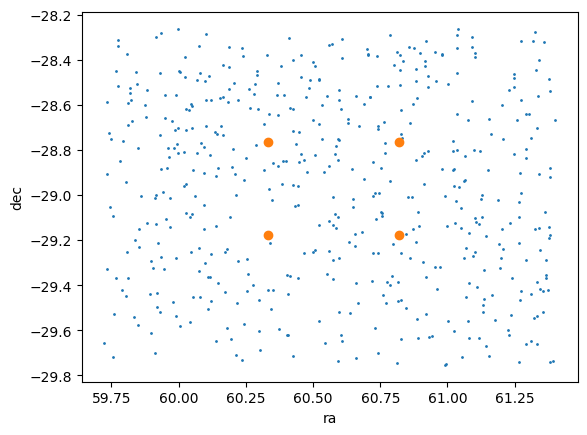

In [8]:
plt.scatter(cl['Xphys'], cl['Yphys'], s = 1)
plt.scatter(x_corner, y_corner)
plt.xlabel("ra")
plt.ylabel("dec")

In [9]:
clbox = cl[(cl["Xphys"]>=x_range[0])*(cl["Xphys"]<=x_range[1])*(cl["Yphys"]>=y_range[0])*(cl["Yphys"]<=y_range[1])]

In [10]:
index = np.random.randint(0,len(clbox), 20)

In [11]:
cl_test = clbox[index]

In [12]:
### CosmoDC2 mag_i results 
for id in cl_test["# ID"]:
    raw_cdt = raw_mb[raw_mb["ASSOC_ID"]==id]
    gen_cdt = gen_mb[gen_mb["ASSOC_ID"]==id]
    if len(raw_cdt) == len(gen_cdt):
        n = 0
        m = 0
        print(f"cluster {id} has the same amount of members (n={len(raw_cdt)})")
        for galid in raw_cdt["GALID"]:
            raw_mb_cdt = raw_cdt[raw_cdt["GALID"]==galid]
            gen_mb_cdt = gen_cdt[gen_cdt["GALID"]==galid]
            if raw_mb_cdt["GALID"] != gen_mb_cdt["GALID"] :
                print(f"For cluster {id} and member {galid}, ids don't match")
                n += 1
            if raw_mb_cdt["ASSOC_PROB"] != gen_mb_cdt["ASSOC_PROB"] :
                print(f"For cluster {id} and member {galid}, pmem don't match (pmem_raw = {raw_mb_cdt['ASSOC_PROB']}, pmem_gen = {gen_mb_cdt['ASSOC_PROB']})")
                m += 1
        if n == 0 and m == 0 :
            print(f"\tmembers of cluster {id} are the same")
        

cluster 764 has the same amount of members (n=753)
	members of cluster 764 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 127 has the same amount of members (n=946)
	members of cluster 127 are the same
cluster 771 has the same amount of members (n=453)
	members of cluster 771 are the same
cluster 7 has the same amount of members (n=859)
	members of cluster 7 are the same
cluster 182 has the same amount of members (n=744)
	members of cluster 182 are the same
cluster 170 has the same amount of members (n=695)
	members of cluster 170 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 390 has the same amount of members (n=515)
	members of cluster 390 are the same
cluster 633 has the same amount of members (n=524)
	members of cluster 633 are the same
cluster 542 has the same amount of members (n=556)
	members of cluster 542 are the same
cluster 168 has the same amount of m

In [13]:
### CosmoDC2 mag_y results 
l = 0
for id in cl_test["# ID"]:
    raw_cdt = raw_mb[raw_mb["ASSOC_ID"]==id]
    gen_cdt = gen_mb[gen_mb["ASSOC_ID"]==id]
    if len(raw_cdt) == len(gen_cdt) and len(raw_cdt) !=0:
        l += 1
        n = 0
        m = 0
        print(f"cluster {id} has the same amount of members (n={len(raw_cdt)})")
        for galid in raw_cdt["GALID"]:
            raw_mb_cdt = raw_cdt[raw_cdt["GALID"]==galid]
            gen_mb_cdt = gen_cdt[gen_cdt["GALID"]==galid]
            if raw_mb_cdt["GALID"] != gen_mb_cdt["GALID"] :
                print(f"For cluster {id} and member {galid}, ids don't match")
                n += 1
            if raw_mb_cdt["ASSOC_PROB"] != gen_mb_cdt["ASSOC_PROB"] :
                print(f"For cluster {id} and member {galid}, pmem don't match (pmem_raw = {raw_mb_cdt['ASSOC_PROB']}, pmem_gen = {gen_mb_cdt['ASSOC_PROB']})")
                m += 1
        if n == 0 and m == 0 :
            print(f"\tmembers of cluster {id} are the same")
print(f"Number of clusters which have members {l}")

cluster 764 has the same amount of members (n=753)
	members of cluster 764 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 127 has the same amount of members (n=946)
	members of cluster 127 are the same
cluster 771 has the same amount of members (n=453)
	members of cluster 771 are the same
cluster 7 has the same amount of members (n=859)
	members of cluster 7 are the same
cluster 182 has the same amount of members (n=744)
	members of cluster 182 are the same
cluster 170 has the same amount of members (n=695)
	members of cluster 170 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 390 has the same amount of members (n=515)
	members of cluster 390 are the same
cluster 633 has the same amount of members (n=524)
	members of cluster 633 are the same
cluster 542 has the same amount of members (n=556)
	members of cluster 542 are the same
cluster 168 has the same amount of m

In [14]:
### DC2 mag_y results 
l = 0
for id in cl_test["# ID"]:
    raw_cdt = raw_mb[raw_mb["ASSOC_ID"]==id]
    gen_cdt = gen_mb[gen_mb["ASSOC_ID"]==id]
    if len(raw_cdt) == len(gen_cdt) and len(raw_cdt) !=0:
        l += 1
        n = 0
        m = 0
        print(f"cluster {id} has the same amount of members (n={len(raw_cdt)})")
        for galid in raw_cdt["GALID"]:
            raw_mb_cdt = raw_cdt[raw_cdt["GALID"]==galid]
            gen_mb_cdt = gen_cdt[gen_cdt["GALID"]==galid]
            if raw_mb_cdt["GALID"] != gen_mb_cdt["GALID"] :
                print(f"For cluster {id} and member {galid}, ids don't match")
                n += 1
            if raw_mb_cdt["ASSOC_PROB"] != gen_mb_cdt["ASSOC_PROB"] :
                print(f"For cluster {id} and member {galid}, pmem don't match (pmem_raw = {raw_mb_cdt['ASSOC_PROB']}, pmem_gen = {gen_mb_cdt['ASSOC_PROB']})")
                m += 1
        if n == 0 and m == 0 :
            print(f"\tmembers of cluster {id} are the same")
print(f"Number of clusters which have members {l}")

cluster 764 has the same amount of members (n=753)
	members of cluster 764 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 127 has the same amount of members (n=946)
	members of cluster 127 are the same
cluster 771 has the same amount of members (n=453)
	members of cluster 771 are the same
cluster 7 has the same amount of members (n=859)
	members of cluster 7 are the same
cluster 182 has the same amount of members (n=744)
	members of cluster 182 are the same
cluster 170 has the same amount of members (n=695)
	members of cluster 170 are the same
cluster 454 has the same amount of members (n=871)
	members of cluster 454 are the same
cluster 390 has the same amount of members (n=515)
	members of cluster 390 are the same
cluster 633 has the same amount of members (n=524)
	members of cluster 633 are the same
cluster 542 has the same amount of members (n=556)
	members of cluster 542 are the same
cluster 168 has the same amount of m

In [15]:
lines = ['Readme', 'How to write text files in Python']
with open('oscour.txt', 'w') as f:
    f.writelines(lines)

In [16]:
nums = list(range(0, len(clbox)))

In [17]:
import random

In [18]:
nums = list(range(0, len(clbox)))
index = random.shuffle(nums)
cl_test = clbox[index[:20]]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
print(index)